# Author - Shreya Jallypally

## Introduction
* Import the iris data and examine the features.
* We will be using all of them to predict species, but the species feature will need to be integer encoded.

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

import pandas as pd
import numpy as np
filepat='C:\IntelPython3\projects\Iris_Data.csv'
irisdata=pd.read_csv(filepat)

In [19]:
lenc=LabelEncoder()
irisdata['species']=lenc.fit_transform(irisdata['species'])


* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by species. 
* Checking the percent composition of each species level for both the train and test data sets.

In [20]:
ss=StratifiedShuffleSplit(random_state=0)
X=[i for i in irisdata.columns if i!='species']
X_dt=irisdata[X]
Y_dt=irisdata['species']
trainidx,testidx=[],[]
for train_idx,test_idx in ss.split(X_dt,Y_dt):
    trainidx.append(train_idx),testidx.append(test_idx)
    X_train,X_test=X_dt.loc[train_idx],X_dt.loc[test_idx]
    Y_train,Y_test=Y_dt.loc[train_idx],Y_dt.loc[test_idx]


In [21]:
X_train.shape[0]/X_dt.shape[0]*100,X_test.shape[0]/X_dt.shape[0]*100

(90.0, 10.0)

* Fiting a decision tree classifier with no set limits on maximum depth, features, or leaves.

In [22]:
from sklearn.tree import DecisionTreeClassifier

Dtc=DecisionTreeClassifier ()
Dtc=Dtc.fit(X_train,Y_train)
Dtc.get_depth(),Dtc.get_n_leaves()

(5, 9)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

def error(ytrue,ypred):
    ErrorDF=pd.Series({
    'accuracy': accuracy_score(ytrue,ypred),
    'precision':precision_score(ytrue,ypred,average='micro'),
    'recall':recall_score(ytrue,ypred,average='micro'),
    'f1'  :f1_score(ytrue,ypred,average='micro'),
    })
    return ErrorDF
    

* Prediction without any parameters

In [42]:
ytrainpredict=Dtc.predict(X_train)
ytestpredict=Dtc.predict(X_test)
e=error(Y_test,ytestpredict)
e1=error(Y_train,ytrainpredict)
Error=pd.DataFrame({'train_error without parms':e1,'test_error without parms':e})
Error.reset_index()

,index,train_error without parms,test_error without parms
0,accuracy,1.0,1.0
1,precision,1.0,1.0
2,recall,1.0,1.0
3,f1,1.0,1.0



* Using grid search with cross validation, find a decision tree that performs well on the test iris_data set. Use a different variable name for this decision tree model.
* Prediction with parameters.

In [45]:
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier()
parameters={'criterion':['gini', 'entropy'],'splitter':('best', 'random'),'max_depth':[1,2],'min_samples_split':[2],'max_features':['auto', 'sqrt', 'log2']}
grids=GridSearchCV(estimator,parameters)
grids=grids.fit(X_train,Y_train)

In [46]:
grids.best_estimator_.get_depth(),grids.best_estimator_.get_n_leaves()

(2, 3)

In [62]:
ytrainpredictparms=grids.predict(X_train)
ytestpredictparms=grids.predict(X_test)
e3=error(Y_test,ytestpredictparms)
e4=error(Y_train,ytrainpredictparms)
Errorp=pd.DataFrame({'train_error with parms':e4,'test_error withparms':e3})
Errorp.reset_index()
pd.concat([Error,Errorp],axis=1)
Errorp

,train_error with parms,test_error withparms
accuracy,0.948148,1.0
precision,0.948148,1.0
recall,0.948148,1.0
f1,0.948148,1.0


In [48]:
feature_cols=[i for i in irisdata.columns if i!='species']
for i in zip(trainidx,testidx):
    X_train = irisdata.loc[i[0], feature_cols]
    y_train = irisdata.loc[i[0], 'species']

    X_test = irisdata.loc[i[1], feature_cols]
    y_test = irisdata.loc[i[1], 'species']

* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test iris_data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted species.

In [50]:
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor()
parameters={'criterion':['mse', 'friedman_mse', 'mae'],'splitter':('best', 'random'),'max_depth':[1,2],'min_samples_split':[2],'max_features':['auto', 'sqrt', 'log2']}
gsriris=GridSearchCV(estimator,parameters)
gsriris=gsriris.fit(X_train,y_train)

In [60]:
from sklearn.metrics import mean_squared_error

ytrainr=gsriris.predict(X_train)
ytestr=gsriris.predict(X_test)


compareerror=pd.Series({'train_mean':mean_squared_error(y_train,ytrainr),
                           'test_mean':mean_squared_error(y_test,ytestr)})
compareerror

train_mean    0.040484
test_mean     0.003669
dtype: float64

## Plotting the graph of both the models i.e decision tree classifier and regressor

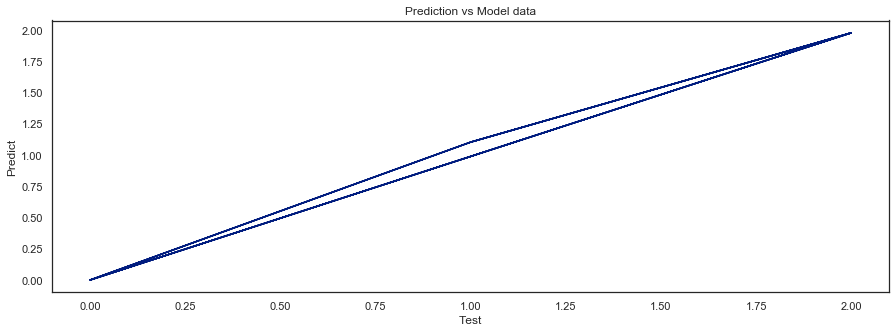

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')
fig,axes=plt.figure(figsize=(15,5)),plt.axes()
axes.plot(y_test,ytestr)
axes.set(xlabel='Test', ylabel='Predict' ,title='Prediction vs Model data');